# Implementing Roberts and Sobel edge detection filters

<small>Author: Fernando Carlos López Hernández</small>
<p>This notebook shows how to implement the Roberts and the Sobel edge detection filters using a convolution.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy import ndimage

The function below is similar to imadjust in MATLAB. 
<p>It converts an image range from [min(<i>x</i>),max(<i>x</i>)] to [<i>to_low</i>,<i>to_high</i>]. The edges correspond to the values furthest from the middle gray. We can activate <i>abs_x</i> parameter to show the distance to the middle. The Equation of a line can be used for this transformation:
<blockquote><i>y = ((to_high-to_low)/(max_x-min_x))*(x-min_x) + to_low </i></blockquote>

In [7]:
def imadjust(x, abs_x = True, to_low=0.0, to_high=1.0):
    if (abs_x):
        x = np.abs(x)
    min_x = np.min(x)
    max_x = np.max(x)
    y = (((x - min_x) / (max_x - min_x)))*(to_high - to_low) + to_low
    return y

First, we load and show the original image:

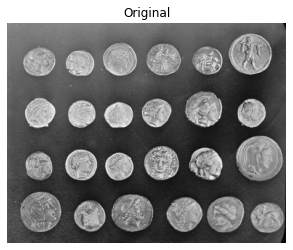

In [8]:

plt.rcParams['figure.figsize'] = [5, 5]
im = data.coins().astype('float')
plt.imshow(im)
plt.axis('off')
plt.imshow(im, cmap = 'gray')
plt.title('Original');

## Roberts filter
The Roberts filter detects edges at angles of 45° and 135° from the horizontal in 3 steps:
<ol><li> We define the <i>Rx</i> and <i>Ry</i> kernels.</li>
<li>We apply the Roberts filter in both directions to obtain the <i>Gx</i> and <i>Gy</i> gradients.</li>
<li>We compute the module of the gradient as:</li><br>&nbsp;<br>
<i>G=sqrt(Gx^2+Gy^2)</i>


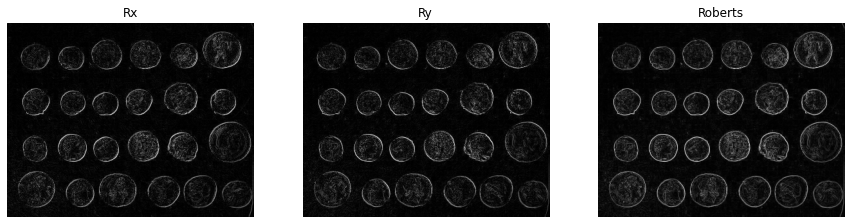

In [9]:
Rx = np.array([[1,0],[0,-1]])
Ry = np.rot90(Rx)
Gx = imadjust(ndimage.convolve(im, Rx, mode='nearest'))
Gy = imadjust(ndimage.convolve(im, Ry, mode='nearest'))
G = np.sqrt(Gx**2+Gy**2)
plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(Gx, cmap = 'gray')
plt.title('Rx')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(Gy, cmap = 'gray')
plt.title('Ry')
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(G, cmap = 'gray')
plt.title('Roberts');

## Sobel filter
The Sobel filter detects edges at angles of 0° and 90° from the horizontal. We compute <i>Gx</i>, <i>Gy</i> and <i>G</i> similarly to the previous filter, but using the <i>Sx</i> and <i>Sy</i> as kernels.

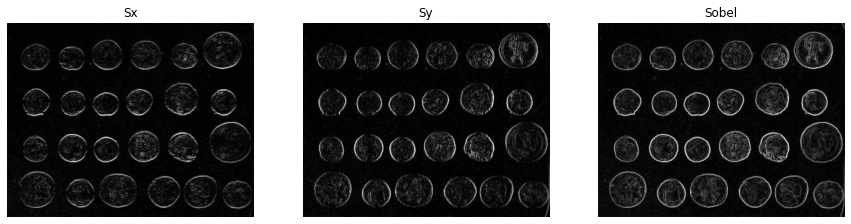

In [10]:
Sx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Sy = np.rot90(Sx)
Gx = imadjust(ndimage.convolve(im, Sx, mode='nearest'))
Gy = imadjust(ndimage.convolve(im, Sy, mode='nearest'))
G = np.sqrt(Gx**2+Gy**2)
plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(Gx, cmap = 'gray')
plt.title('Sx')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(Gy, cmap = 'gray')
plt.title('Sy')
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(G, cmap = 'gray')
plt.title('Sobel');